In [796]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


from src.path_loss import PathLossInHIndoorOffice, PathLossInHShoppingMalls
from src.network_sim import NetworkSimulator
from src.algorithm import wmmse
from src.sc import SyntheticControl
from src.experiment import ExperimentInterferenceModelComparison

%reload_ext autoreload
%autoreload 2
%aimport src

In [732]:
frequency_Hz= 50 * 1e9 # Hz
distance_m = 50
sample_size = 10

In [733]:
pd.DataFrame({
    'PathLossInHIndoorOffice':[PathLossInHIndoorOffice().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
    'PathLossInHShoppingMalls': [PathLossInHShoppingMalls().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
})

,PathLossInHIndoorOffice,PathLossInHShoppingMalls
0,-128.703296,-115.809491
1,-131.299651,-114.944472
2,-133.465390,-104.788746
3,-106.552759,-108.219987
4,-122.877346,-105.804879
5,-130.733423,-117.882588
6,-124.121737,-112.777818
7,-128.530436,-102.668539
8,-115.646947,-106.607279
9,-135.001657,-112.414969


In [753]:
simulator = NetworkSimulator(Tx_radius=100, Rx_radius=25, num_Tx_netA=10, num_Rx_per_Tx_netA=5, num_Tx_netB=3, num_Rx_per_Tx_netB=5)

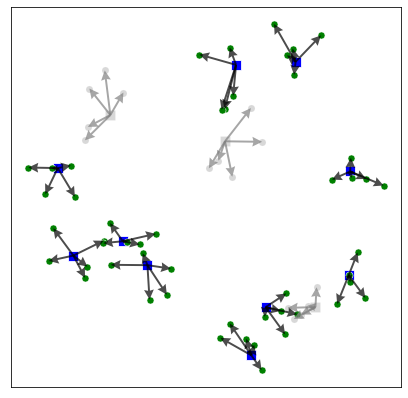

In [754]:
simulator.plot_network()

In [755]:
pd.DataFrame(simulator.gain_mat_dBm)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-97.643667,-100.335537,-91.016621,-96.896523,-95.717352,-93.460652,-108.751107,-116.169452,-105.049190,-99.915378,...,-106.870244,-110.184900,-109.846530,-98.314834,-107.288653,-126.960383,-135.607456,-125.906383,-119.834225,-128.039426
1,-104.560029,-103.719979,-104.547621,-102.268122,-98.991111,-77.580837,-87.554466,-101.231623,-113.637652,-79.977216,...,-106.171168,-107.054596,-106.206999,-113.147491,-108.773317,-129.620013,-121.516103,-113.975975,-114.012874,-118.042474
2,-108.815918,-118.256044,-122.216545,-111.836771,-112.214908,-109.256362,-108.229810,-117.933480,-117.102043,-112.294300,...,-113.271625,-119.011027,-112.726044,-108.195200,-98.023941,-103.919325,-104.810566,-124.976963,-111.880437,-114.496786
3,-130.858556,-138.477177,-125.133324,-115.431751,-130.376304,-128.381321,-128.559453,-137.927538,-135.980300,-137.775163,...,-116.537562,-117.286090,-118.476000,-134.053978,-129.603956,-126.607071,-132.877257,-128.990283,-133.533259,-121.489433
4,-140.968154,-131.745631,-130.196212,-139.514233,-136.692210,-141.314812,-129.793737,-137.605873,-142.982383,-121.168065,...,-106.229301,-117.513735,-120.765834,-112.248425,-120.668018,-109.642324,-113.434610,-111.412138,-119.475458,-108.042929
5,-127.750557,-108.699615,-108.472664,-119.481594,-120.035771,-129.994238,-127.102990,-126.158079,-126.958664,-130.408925,...,-112.507224,-118.795477,-119.499625,-117.451035,-122.860336,-135.270082,-129.767540,-119.455204,-123.803366,-116.373481
6,-140.730368,-116.552648,-117.519045,-122.418451,-115.406603,-129.662052,-128.810206,-134.976167,-148.659882,-119.636923,...,-109.487848,-100.274992,-114.610402,-116.735817,-114.000957,-109.977877,-126.427736,-111.566502,-136.588156,-109.410927
7,-131.309580,-131.803881,-131.341240,-130.302728,-113.026336,-114.105646,-117.572029,-128.274266,-124.388978,-112.774186,...,-116.317592,-111.984161,-128.133246,-114.257585,-108.832372,-111.083567,-90.733507,-95.713295,-99.967513,-95.439404
8,-123.406001,-116.965468,-122.979907,-133.174112,-105.086240,-121.084860,-133.495383,-131.890777,-134.581280,-126.216374,...,-115.475252,-125.929310,-109.939179,-117.586901,-97.192091,-100.607837,-100.887771,-87.061669,-105.421744,-100.727002
9,-123.915360,-120.981199,-122.215246,-112.564860,-119.075749,-138.742666,-128.148197,-132.615373,-120.853840,-141.932650,...,-110.802585,-118.080741,-134.964472,-122.136098,-123.465306,-128.718687,-145.120616,-141.834598,-135.522529,-143.861449


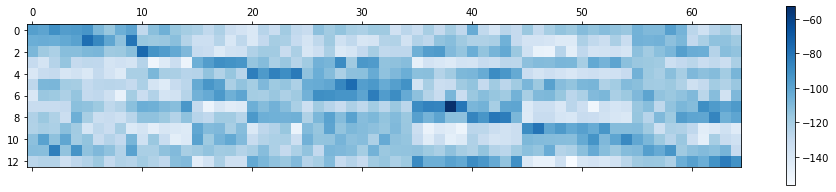

In [756]:
simulator.plot_gain_mat()

In [794]:
model_comparison = ExperimentInterferenceModelComparison(simulator=simulator)
model_comparison.data_generation(num_samples=100, max_power=200, netB_power_pattern='dependent')
model_comparison.modeling()
model_comparison.run(num_rounds=100, power_pattern_netA='wmmse', power_pattern_netB='dependent')

Weighted Sum Rate: 273.63947846765325 Convergence Error at Round 5000 0.0014569490672268234


,real_interference,sc_bias,lr_bias
0,8.000106e-08,-0.093923,0.236795


In [795]:
model_comparison.run(num_rounds=100, power_pattern_netA='wmmse', power_pattern_netB='zero')

,real_interference,sc_bias,lr_bias
0,2.432059e-08,0.011588,3.068359


In [797]:
model_comparison.run(num_rounds=100, power_pattern_netA='wmmse', power_pattern_netB='uniform')

,real_interference,sc_bias,lr_bias
0,7.002455e-08,-0.061149,0.413003
